In [23]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
import xgboost

# Figures inline and set visualization style
%matplotlib inline
sns.set()

ModuleNotFoundError: No module named 'xgboost'

In [2]:
# import data
data_train = pd.read_csv(r'C:\Installs\Data science\heart_decease_prediction\train_values.csv')
data_test = pd.read_csv(r'C:\Installs\Data science\heart_decease_prediction\test_values.csv')
data_var =  pd.read_csv(r'C:\Installs\Data science\heart_decease_prediction\train_labels.csv')

In [3]:
data_train.describe()
#data_var.shape

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [4]:
data_var.columns

Index(['patient_id', 'heart_disease_present'], dtype='object')

In [5]:
#sns.countplot(x='heart_disease_present', data=data_var);


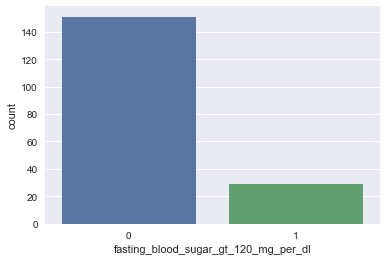

In [6]:
#0:female, 1:male
sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl', data=data_train);

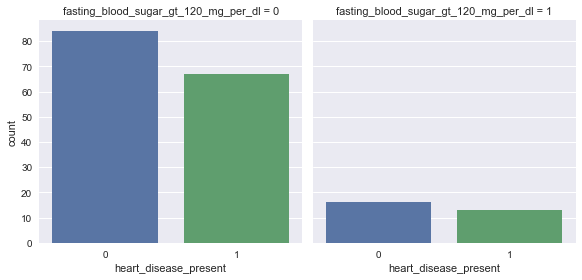

In [7]:
# merge train data to train labels

df_train = pd.merge( data_train,data_var,how='outer', on='patient_id')

# sex and heart disease relation
sns.factorplot(x='heart_disease_present', col='fasting_blood_sugar_gt_120_mg_per_dl', kind='count', data=df_train);

In [8]:

# slope_of_peak_excercise and heart disease relation
#sns.factorplot(x='heart_disease_present', col='slope_of_peak_exercise_st_segment', kind='count', data=df_train);
#sns.factorplot(x='heart_disease_present', col='chest_pain_type', kind='count', data=df_train);
#sns.factorplot(x='heart_disease_present', col='num_major_vessels', kind='count', data=df_train)
#sns.factorplot(x='heart_disease_present', col='exercise_induced_angina', kind='count', data=df_train)


In [9]:
#age distribution
#sns.distplot(df_train.age, kde=False);

In [10]:
#df_train.groupby('heart_disease_present').age.hist(alpha=0.6);

In [11]:
#sns.stripplot(x='heart_disease_present', y='age', data=df_train, alpha=0.3, jitter=True);

In [12]:
#sns.swarmplot(x='heart_disease_present', y='age', data=df_train);

In [13]:
#df_train.groupby('heart_disease_present').age.describe()

In [14]:
#df_train.info()

In [15]:

df_train_final = df_train.drop(['patient_id','heart_disease_present'],axis=1)
df_test_final = data_test.drop('patient_id',axis=1)
df_train_final = pd.get_dummies(df_train_final,drop_first=True)
df_test_final = pd.get_dummies(df_test_final,drop_first=True)
#df_train_final.thal_normal.astype('category')

df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
thal_normal                             180 non-null uint8
thal_reversible_defect                  180 non-null uint8
dtypes: float64(1), int64(11), uint8(2)
memory usage: 23.6 KB


In [16]:
#bulding model: transform dataframe to array
X = df_train_final.values
test = df_test_final.values
y = data_var.heart_disease_present.values


In [22]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate a decision tree classifier: clf
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: clf_cv
logreg_cv = GridSearchCV(logreg, param_grid=param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Decision Tree Parameters: {'C': 0.4393970560760795, 'penalty': 'l2'}
Best score is 0.85


In [18]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = logreg_cv.predict_proba(test)
data_test['heart_disease_present'] = Y_pred[:,1]


In [19]:
data_test[['patient_id', 'heart_disease_present']].to_csv('kotharv_logr_dum_tree.csv', index=False)